In [3]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions


In [6]:
df = pd.DataFrame()

In [7]:
# create the datafram

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [9]:
import matplotlib.pyplot as plt


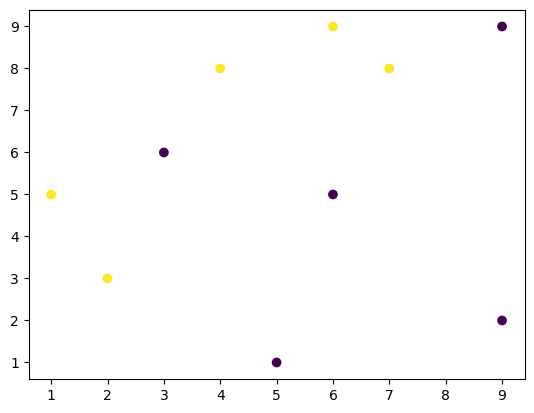

In [12]:
plt.scatter(df['X1'],df['X2'],c=df['label'])
plt.show()

# 1.Now add the weight to the all rows weight = 1/n

In [13]:
df['weight'] = 1/df.shape[0]

In [14]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


# 2. Now aaply the Decison stump

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth= 1)

In [19]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [22]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

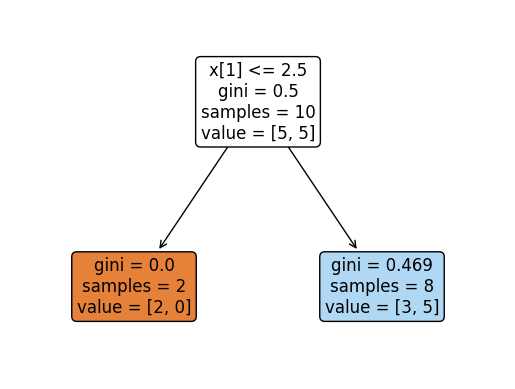

In [27]:
from sklearn.tree import plot_tree

plot_tree(dt1,rounded = True,filled =True,fontsize= 12)

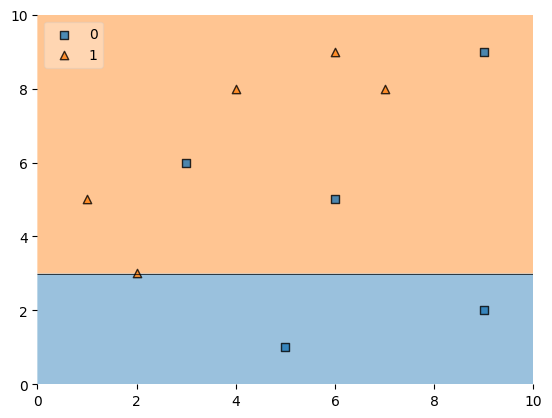

In [29]:
plot_decision_regions(X,y,clf = dt1,legend =2)
plt.show()

In [30]:
df['y_pred'] = dt1.predict(X)

In [31]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


# calculate the error

In [115]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error+0.00000001))

In [38]:
alpha1 =calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [39]:
# now update the weights

def update_row_weights(row,alpha = 0.423):
  if row['y_pred'] == row['label']:
    return row['weight']* np.exp(-alpha)
  else:
    return row['weight']* np.exp(alpha)

In [40]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [41]:
df

,X1,X2,label,weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [42]:
df['updated_weights'].sum()

0.9165153319682015

# here the sum of the aal the weight should be 1 so normalize it now

In [43]:
df['normalized_weight'] = df['updated_weights']/df['updated_weights'].sum()

In [46]:
df['normalized_weight'].sum() # now after normalization we got 1

1.0

In [47]:
df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


# 3.Create the range

In [51]:
df['cumsum_lower'] = df['cumsum_uppper'] - df['normalized_weight']

In [54]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])

In [57]:
df[['X1','X2','label','weight','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


# Random generate the number and find the new dataset

In [59]:
def create_new_df(df):
  indices =[]

  for i in range(df.shape[0]):
    a = np.random.random()

    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [60]:
index_values = create_new_df(df)

In [61]:
index_values

[0, 8, 2, 6, 2, 4, 3, 1, 8, 1]

In [64]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [65]:
second_df

,X1,X2,label,weight
0,1,5,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1


In [66]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [71]:
X = second_df.iloc[:,:2].values
y = second_df.iloc[:,2].values

In [72]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]')]

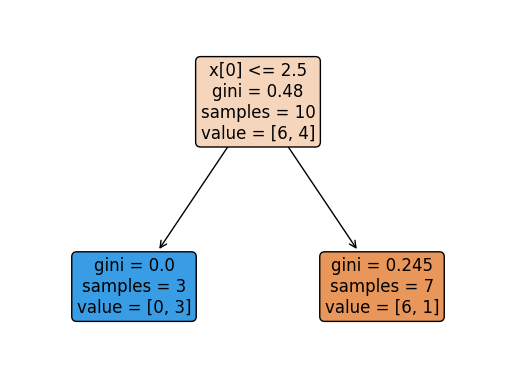

In [73]:
plot_tree(dt2,filled = True,rounded = True,fontsize = 12)

<Axes: >

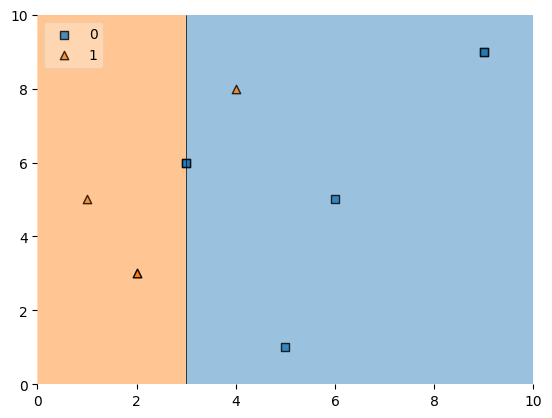

In [74]:
plot_decision_regions(X,y,clf = dt2,legend =2)

In [75]:
second_df['y_pred'] = dt2.predict(X)

In [76]:
second_df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,0
1,2,3,1,0.1,1
8,9,9,0,0.1,0
1,2,3,1,0.1,1


In [79]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [84]:
def update_row_weights(row,alpha = 1.098):
  if row['y_pred'] == row['label']:
    return row['weight']* np.exp(-alpha)
  else:
    return row['weight']* np.exp(alpha)

In [86]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [87]:
second_df

,X1,X2,label,weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.033354
8,9,9,0,0.1,0,0.033354
2,3,6,0,0.1,0,0.033354
6,6,5,0,0.1,0,0.033354
2,3,6,0,0.1,0,0.033354
4,5,1,0,0.1,0,0.033354
3,4,8,1,0.1,0,0.299816
1,2,3,1,0.1,1,0.033354
8,9,9,0,0.1,0,0.033354
1,2,3,1,0.1,1,0.033354


In [88]:
second_df['updated_weights'].sum()

0.6000001124692275

In [94]:
# normalize it
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [95]:
second_df['normalized_weights'].sum()

1.0

In [96]:
second_df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.033354,0.055590
8,9,9,0,0.1,0,0.033354,0.055590
2,3,6,0,0.1,0,0.033354,0.055590
6,6,5,0,0.1,0,0.033354,0.055590
2,3,6,0,0.1,0,0.033354,0.055590
4,5,1,0,0.1,0,0.033354,0.055590
3,4,8,1,0.1,0,0.299816,0.499694
1,2,3,1,0.1,1,0.033354,0.055590
8,9,9,0,0.1,0,0.033354,0.055590
1,2,3,1,0.1,1,0.033354,0.055590


In [98]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [99]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [100]:
second_df[['X1','X2','label','weight','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.055590,0.000000,0.055590
8,9,9,0,0.1,0,0.055590,0.055590,0.111179
2,3,6,0,0.1,0,0.055590,0.111179,0.166769
6,6,5,0,0.1,0,0.055590,0.166769,0.222358
2,3,6,0,0.1,0,0.055590,0.222358,0.277948
4,5,1,0,0.1,0,0.055590,0.277948,0.333537
3,4,8,1,0.1,0,0.499694,0.333537,0.833231
1,2,3,1,0.1,1,0.055590,0.833231,0.888821
8,9,9,0,0.1,0,0.055590,0.888821,0.944410
1,2,3,1,0.1,1,0.055590,0.944410,1.000000


In [101]:
index_values = create_new_df(second_df)

In [102]:
index_values

[3, 3, 6, 3, 2, 3, 3, 3, 2, 3]

In [104]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weight
6,6,5,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1


# 3Rd decison stump

In [105]:
dt3 = DecisionTreeClassifier(max_depth=1 )

In [107]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [108]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

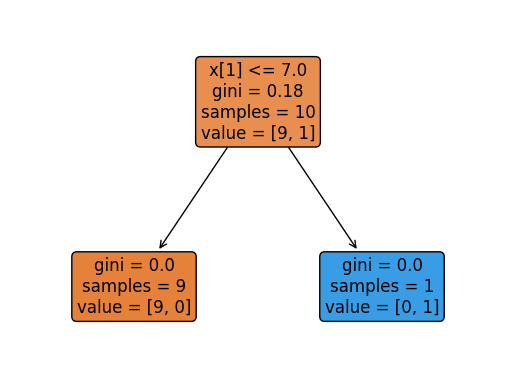

In [109]:
plot_tree(dt3,filled= True,rounded =True,fontsize = 12)

<Axes: >

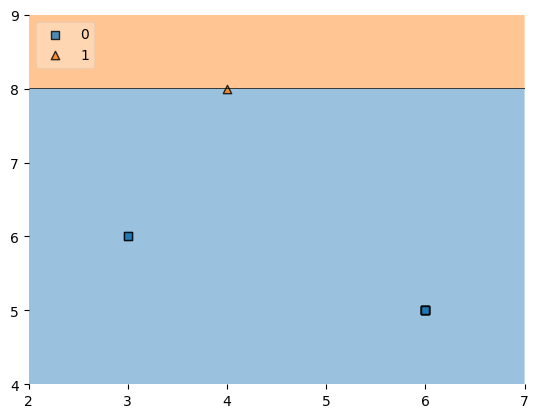

In [110]:
plot_decision_regions(X,y,clf = dt3,legend= 2)

In [111]:
third_df['y_pred'] = dt3.predict(X)

In [112]:
third_df

,X1,X2,label,weight,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0


In [117]:
alpha3 = calculate_model_weight(0)
alpha3

9.210340371976184

In [118]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 9.210340371976184


# Prediction

In [149]:
query = np.array([1,5]).reshape(1,2)

In [150]:
dt1.predict(query)

array([1])

In [151]:
dt2.predict(query)

array([1])

In [152]:
dt3.predict(query)

array([0])

# Now final decsion

In [147]:
res = alpha1*1 + alpha2*1 +alpha3*(-1)

In [148]:
np.sign(res) #so output will be one

-1.0

In [141]:
query1 = np.array([9,9]).reshape(1,2)

In [142]:
dt1.predict(query1)

array([1])

In [143]:
dt2.predict(query1)

array([0])

In [144]:
dt3.predict(query1)

array([1])

In [145]:
res = alpha1*1 + alpha2*(-1) +alpha3*1
res

8.535377013501675

In [146]:
np.sign(res)

1.0